In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
data1 = pd.read_csv('data/winequality-red.csv', delimiter=";")
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data understanding and cleaning

In [3]:
#gives a good insight of the dataset
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
print(data1.shape)
data1.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Find NaN if any using 2 different methods
print(np.where(pd.isnull(data1)))
print(data1.isnull().values.any()) 

(array([], dtype=int64), array([], dtype=int64))
False


In [6]:
#Looping through each column to find NaN if any
for col in data1.columns:
    for item, frame in data1[str(col)].iteritems(): #frame is each cell of a col 
        if not pd.notnull(frame):
            print(frame)

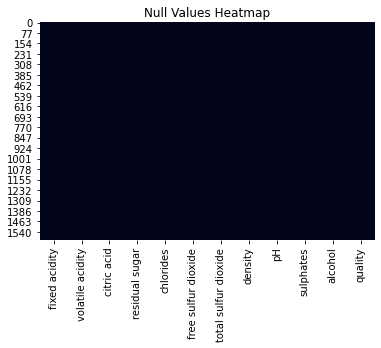

In [7]:
# Using seaborn heatmap to see null values heatmap
sns.heatmap(data1.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

# Insights
1- mean value of all columns is greater than zero which means no column is completely empty

2- dimension is (1599,12) and each column have 1599 non-null count so data has no empty cell

3- after several different types of test i am now sure that data is free of empty cells. Hurray!!

# Exploratory Analysis

We can do exploaratory analys by selecting a few columns as series and analyse it. Since all columns are numerical (float,int) so it's kind of hard for me to do analysis.

In [8]:
#Lets plot all the columns maybe that can give us some help finding a start point
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

<ipython-input-8-1060f8091ad0>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nHistRow, nHistogramPerRow, i+1)


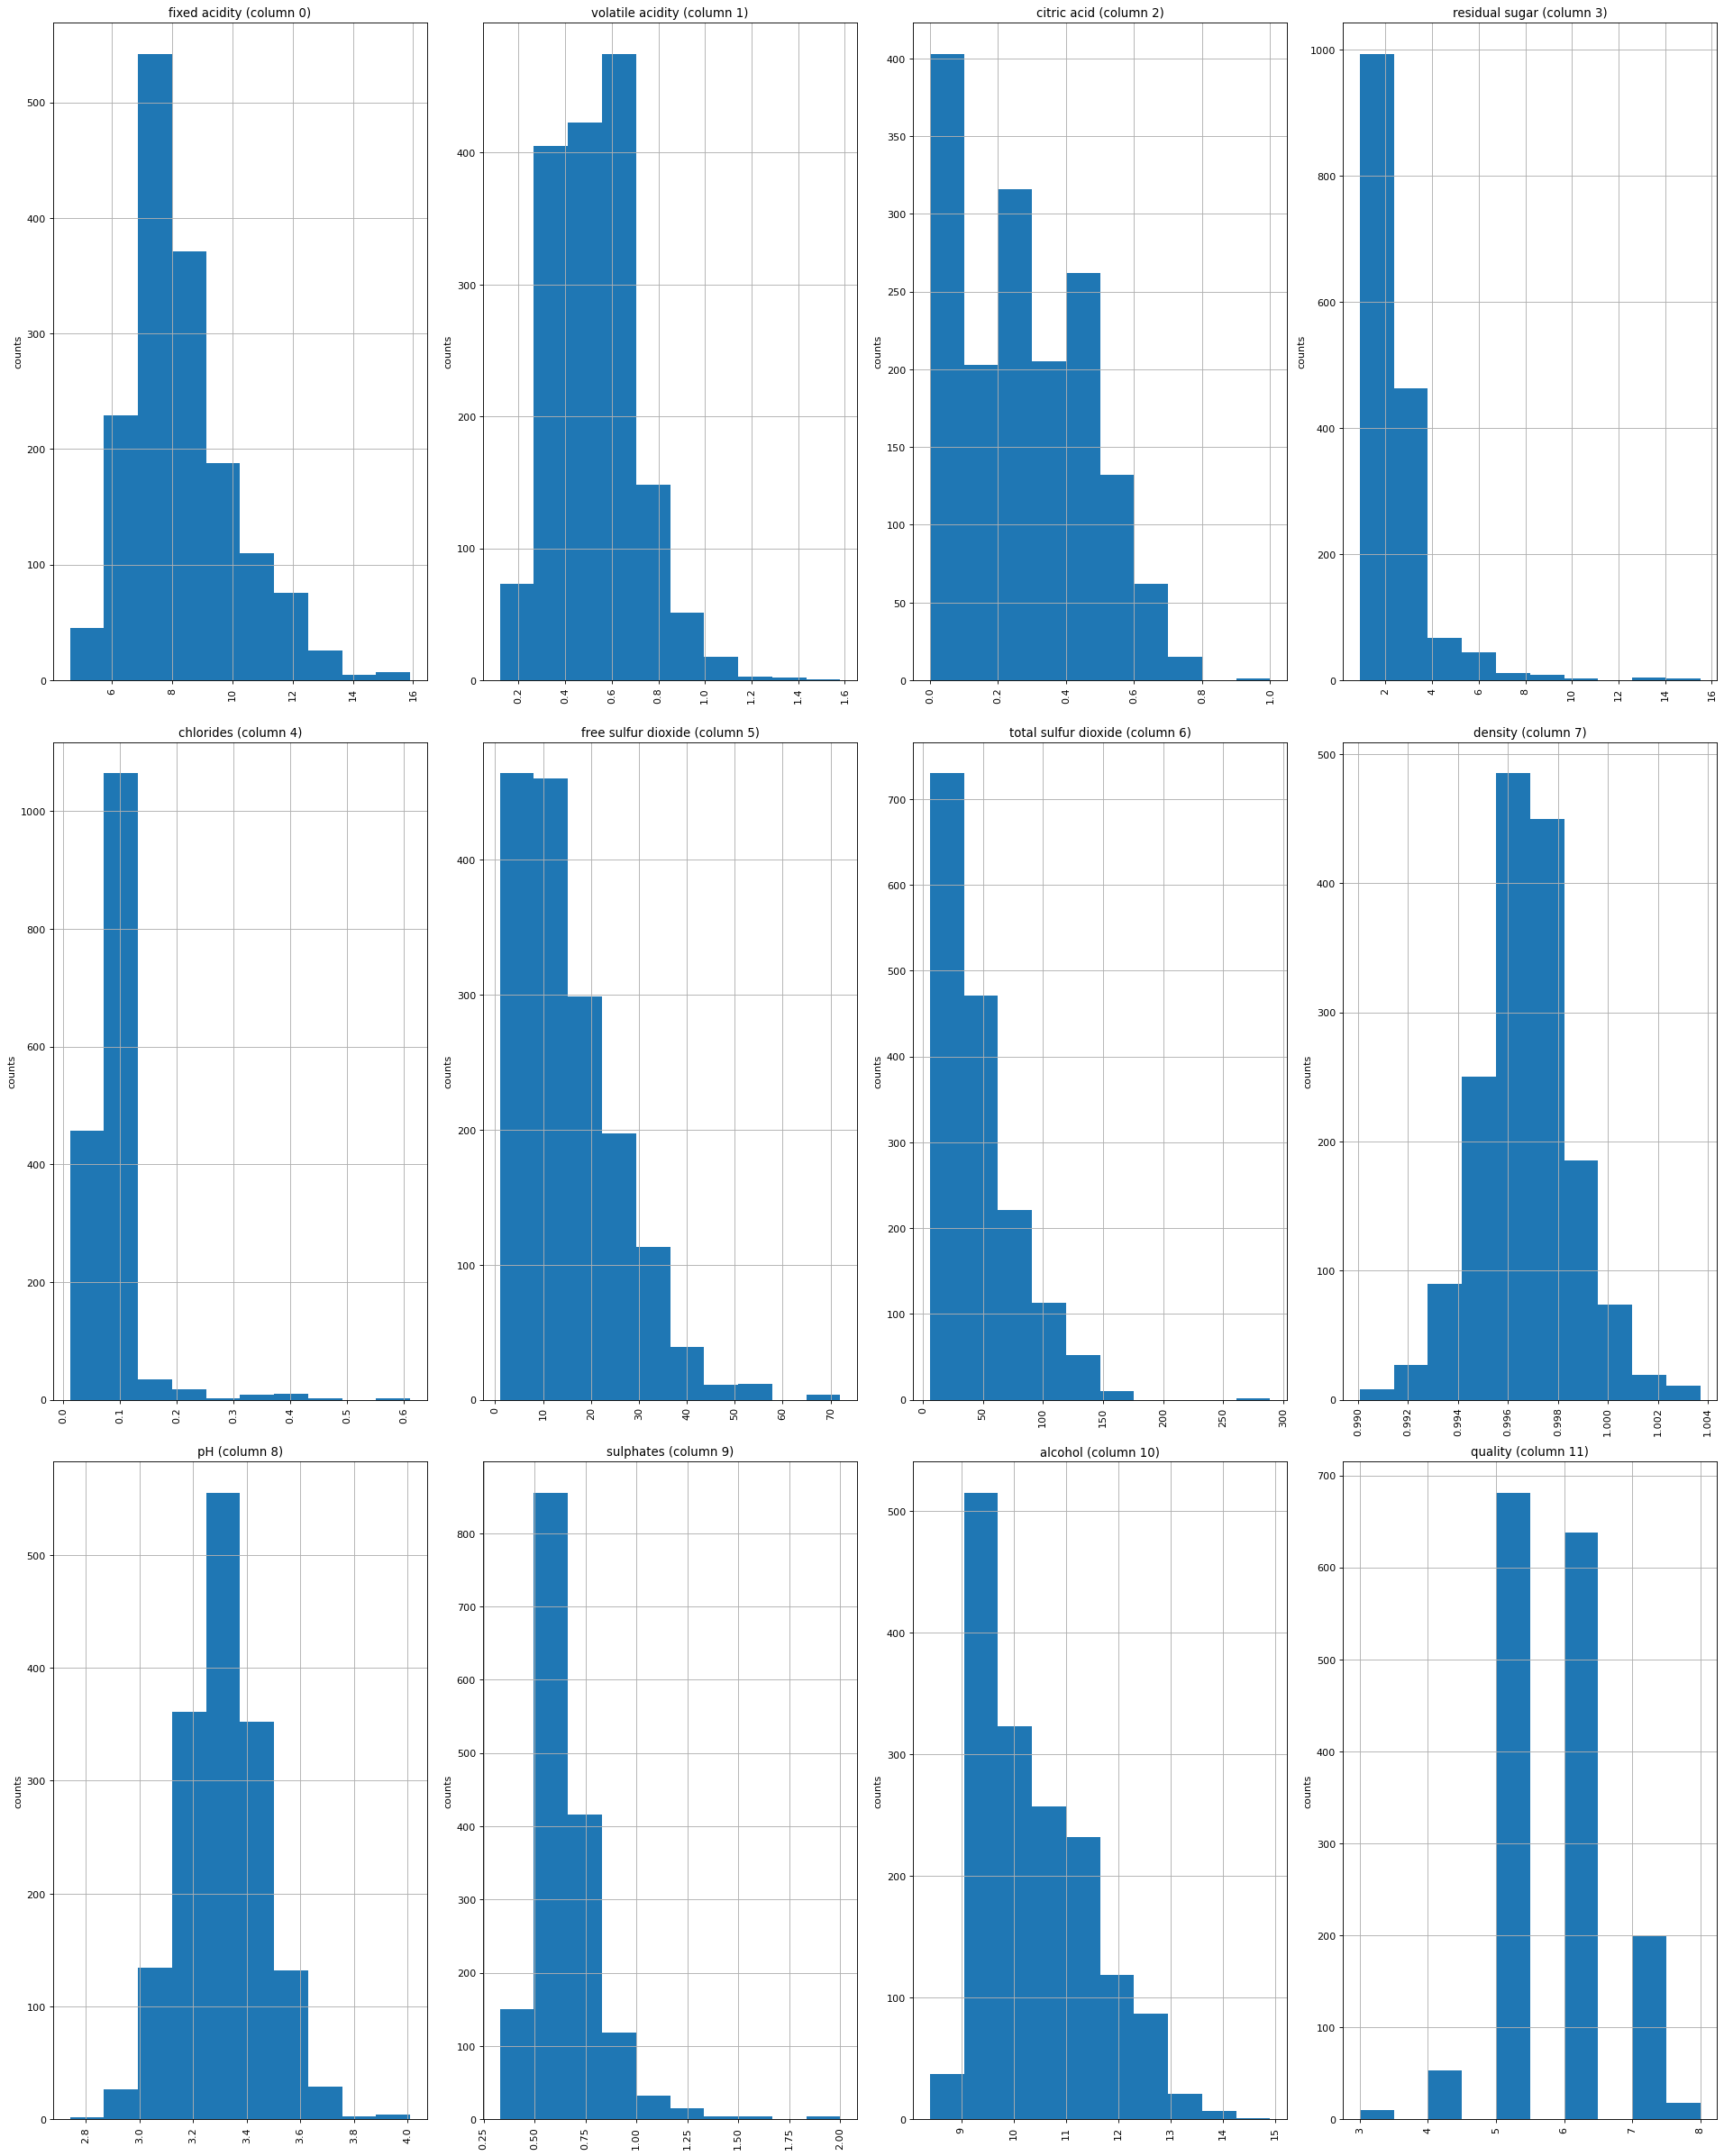

In [9]:
plotHistogram(data1,12,4)

In [12]:
#lets find out the corelation between all columns and visualize the relationship between columns having the highest corelation
def plotCorrelationMatrix(df, graphWidth):
    # filename = df.dataframeName
    # df = df.dropna('columns') # drop columns with NaN
    # df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr(method="kendall")
    figure, ax = plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    for (i, j), z in np.ndenumerate(data):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for red wine data', fontsize=15)
    plt.show()

In [13]:
plotCorrelationMatrix(data1,8)

TypeError: cannot unpack non-iterable Figure object

<Figure size 640x640 with 0 Axes>

In [59]:
corr = data1.corr()
corr.style.background_gradient(cmap='PuOr_r')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [66]:
print(data1.quality.unique())


[5 6 7 4 8 3]


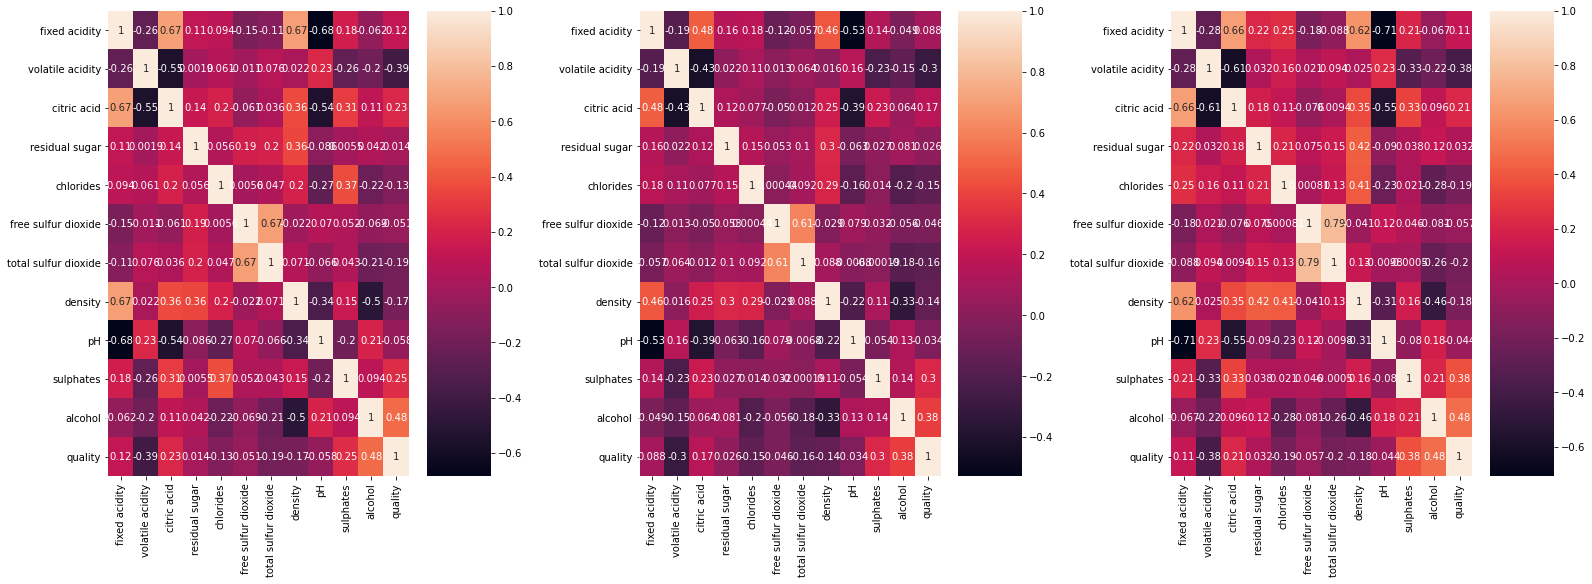

In [31]:
import seaborn as sns

pearson_corr = data1.corr(method="pearson")
kendall_corr = data1.corr(method="kendall")
spearman_corr = data1.corr(method="spearman")

figure, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(22,8))


sns.heatmap(pearson_corr, annot=True, ax=axes[0])
sns.heatmap(kendall_corr, annot=True, ax=axes[1])
sns.heatmap(spearman_corr, annot=True, ax=axes[2])

plt.show()

In [35]:
pearson_selected = pearson_corr["quality"].sort_values(ascending=False)[:5].index.values.tolist()
kendall_selected = kendall_corr["quality"].sort_values(ascending=False)[:5].index.values.tolist()
spearman_selected = spearman_corr["quality"].sort_values(ascending=False)[:5].index.values.tolist()
all_features = pearson_selected + kendall_selected + spearman_selected
unique_features = set(all_features)

In [41]:
features = data1[unique_features].drop("quality", axis=1)
target = data1[unique_features]["quality"].to_frame()
features

,fixed acidity,sulphates,alcohol,citric acid
0,7.4,0.56,9.4,0.00
1,7.8,0.68,9.8,0.00
2,7.8,0.65,9.8,0.04
3,11.2,0.58,9.8,0.56
4,7.4,0.56,9.4,0.00
...,...,...,...,...
1594,6.2,0.58,10.5,0.08
1595,5.9,0.76,11.2,0.10
1596,6.3,0.75,11.0,0.13
1597,5.9,0.71,10.2,0.12


In [52]:
tsneDimensions3 = TSNE(n_components=3)
pcaDimensions3 = PCA(n_components=3)

tsneDimensions2 = TSNE(n_components=2)
pcaDimensions2 = PCA(n_components=2)



In [ ]:
fig = plt.figure(figsize=(22, 12), dpi=80)
fig.suptitle("PCA vs. t-SNE")

# PCA with 2 Components
ax = fig.add_subplot(2, 2, 1)
ax.title.set_text("PCA with 2 Components")
sns.scatterplot(
    x="PCA_1", y="PCA_2",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=plotting_dataframe,
    legend="full",
    alpha=0.9,
    ax=ax
)

# PCA with 3 Components
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.title.set_text("PCA with 3 Components")
ax.scatter(
    xs=plotting_dataframe["PCA_1"], 
    ys=plotting_dataframe["PCA_2"], 
    zs=plotting_dataframe["PCA_3"], 
    c=plotting_dataframe["target"], 
    cmap='tab10',
)

# t-SNE with 2 Components
ax = fig.add_subplot(2, 2, 3)
ax.title.set_text("t-SNE with 2 Components")
sns.scatterplot(
    x="t-SNE_1", y="t-SNE_2",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=plotting_dataframe,
    legend="full",
    alpha=0.9,
    ax=ax
)

# t-SNE with 3 Components
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.title.set_text("t-SNE with 3 Components")
ax.scatter(
    xs=tsneDimensions3[0], 
    ys=tsneDimensions3[1], 
    zs=tsneDimensions3[2], 
    c=tsneDimensions3["target"], 
    cmap='tab10',
)
plt.show()

In [53]:
features_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = features_scaler.fit_transform(features.values)
scaled_target = target_scaler.fit_transform(target.values)



In [47]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, shuffle=True)

# Insight
1 - Features citric acid and fixed acidity are most related



# Machine Learning